# 3 Classificação

## 3.1) O aumento dos gastos e investimentos com a educação influencia na a taxa de analfabetismo entre pessoas de 15 a 24 anos?

### Instalando e importando as bibliotecas utlizadas nesse notebook.

In [1]:
!pip3 install pandas
!pip3 install numpy
!pip3 install sklearn
!pip3 install graphviz
!pip3 install seaborn
#!apt-get install graphviz

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import graphviz

## 3.1.1) Carga e transformação da massa bruta de todos os indicadores e países.

#### Nessa etapa é carregado o dataset "massa_bruta_pais_por_indicadores.csv" (resultado do notebook "2_extracao_transformacao_massa_indicadores_todos_paises") para usar os dados de países e seus respectivos indicadores.

In [3]:
massa_bruta_pais_por_indicadores = pd.read_csv('../data/massa_bruta_pais_por_indicadores.csv')

#### Após essa carga, são selecionados as colunas dos anos de 1998 a 2013 (esse intervalo foi identificado no notebook "1_extracao_faixa_temporal_melhor_distribuicao_valores") e as linhas dos indicadores de analfabetismo e gastos ou investimentos relacionados com educação.

- 'UIS.LP.AG15T24': analfabetismo entre 15 a 24 anos.
- 'UIS.XSPENDP.FDPUB.FNS': gastos com profissionais da área da edução em instituições públicas.
- 'UIS.XSPENDP.FDPUB.FNCAP': total de gastos com educação em instituições públicas.
- 'UIS.XSPENDP.FDPUB.FNNONS': gastos com logística, materiais de estudo e outros relacionados à área da educação.
- 'UIS.XGDP.FSGOV.FDINSTADM.FFD': gastos com instraestrutura de instituições de públicas de ensino.
- 'SE.XPD.TOTL.GD.ZS': percentual do PIB direcionado à educação.

In [4]:
anos = ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', 
        '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']

indicadores = ['UIS.LP.AG15T24', 'UIS.XSPENDP.FDPUB.FNS', 'UIS.XSPENDP.FDPUB.FNCAP', 
               'UIS.XSPENDP.FDPUB.FNNONS', 'UIS.XGDP.FSGOV.FDINSTADM.FFD', 'SE.XPD.TOTL.GD.ZS']

indicadores_analfabetismo = ['UIS.LP.AG15T24']

indicadores_gastos_educacao = ['UIS.XSPENDP.FDPUB.FNS', 'UIS.XSPENDP.FDPUB.FNCAP', 'UIS.XSPENDP.FDPUB.FNNONS', 
                               'UIS.XGDP.FSGOV.FDINSTADM.FFD', 'SE.XPD.TOTL.GD.ZS']

#### Aqui há extração dos nomes dos países (extraídos do dataset "massa_bruta_pais_por_indicadores.csv", através da filtragem de valores únicos). Em seguida, os dados desse dataset são filtrados pelos indicadores (especificados na célula acima, "indicadores").

In [5]:
paises = massa_bruta_pais_por_indicadores['Country Name'].unique()

df_massa_bruta_por_indicador = massa_bruta_pais_por_indicadores.loc[massa_bruta_pais_por_indicadores['Indicator Code'].isin(indicadores)]

colunas_transformacao = ['Pais', 'Indicador', '1998', '1999', '2000', '2001', '2002', '2003', 
                         '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012']


#### O passo abaixo processará os dados filtrados pelos indicadores de analfabetismo e econômicos para:
- Trocar o valor das linhas do indicador de educação por zero ou um (um quando houver aumento de um ano para o outro e zero não);
- Preencher o dataframe "df_resultado_transformacao" com o resultado disso;
- Substituir os valores em branco por zero;
- Ordernar "df_resultado_transformacao" pelo nome do país; e
- Ajustar os índices de "df_resultado_transformacao".

#### Os dados no dataframe "df_resultado_transformacao" estarão agrupados por país e indicadores.
#### Os valores de zero ou um nas linhas referentes ao indicador de analfabetismo mostram se, em cada ano, houve um aumento ou não da taxa de analfabetismo.

In [6]:
df_resultado_transformacao = pd.DataFrame(columns=colunas_transformacao)

for pais in paises:
    df_pais = df_massa_bruta_por_indicador.loc[df_massa_bruta_por_indicador['Country Name'] == pais]

    df_1998_a_2013 = df_pais.iloc[:, 2:18]
    df_1998_a_2013.index = range(df_1998_a_2013.shape[0])
    df_1998_a_2013 = df_1998_a_2013.fillna(0)
   
    indicador = df_pais['Indicator Code']
    indicador.index = range(indicador.shape[0])
    
    for index, indicador in indicador.items():
        
        if indicador in indicadores_analfabetismo:
            valor_1998_1999 = 1 if df_1998_a_2013['1999'].iloc[index] - df_1998_a_2013['1998'].iloc[index] > 0 else 0
            valor_1999_2000 = 1 if df_1998_a_2013['2000'].iloc[index] - df_1998_a_2013['1999'].iloc[index] > 0 else 0
            valor_2000_2001 = 1 if df_1998_a_2013['2001'].iloc[index] - df_1998_a_2013['2000'].iloc[index] > 0 else 0
            valor_2001_2002 = 1 if df_1998_a_2013['2002'].iloc[index] - df_1998_a_2013['2001'].iloc[index] > 0 else 0
            valor_2002_2003 = 1 if df_1998_a_2013['2003'].iloc[index] - df_1998_a_2013['2002'].iloc[index] > 0 else 0
            valor_2003_2004 = 1 if df_1998_a_2013['2004'].iloc[index] - df_1998_a_2013['2003'].iloc[index] > 0 else 0
            valor_2004_2005 = 1 if df_1998_a_2013['2005'].iloc[index] - df_1998_a_2013['2004'].iloc[index] > 0 else 0
            valor_2005_2006 = 1 if df_1998_a_2013['2006'].iloc[index] - df_1998_a_2013['2005'].iloc[index] > 0 else 0
            valor_2006_2007 = 1 if df_1998_a_2013['2007'].iloc[index] - df_1998_a_2013['2006'].iloc[index] > 0 else 0
            valor_2007_2008 = 1 if df_1998_a_2013['2008'].iloc[index] - df_1998_a_2013['2007'].iloc[index] > 0 else 0
            valor_2008_2009 = 1 if df_1998_a_2013['2009'].iloc[index] - df_1998_a_2013['2008'].iloc[index] > 0 else 0
            valor_2009_2010 = 1 if df_1998_a_2013['2010'].iloc[index] - df_1998_a_2013['2009'].iloc[index] > 0 else 0
            valor_2010_2011 = 1 if df_1998_a_2013['2011'].iloc[index] - df_1998_a_2013['2010'].iloc[index] > 0 else 0
            valor_2011_2012 = 1 if df_1998_a_2013['2012'].iloc[index] - df_1998_a_2013['2011'].iloc[index] > 0 else 0
            valor_2012_2013 = 1 if df_1998_a_2013['2013'].iloc[index] - df_1998_a_2013['2012'].iloc[index] > 0 else 0

            valores = [pais, indicador, valor_1998_1999, valor_1999_2000, valor_2000_2001, valor_2001_2002, 
                       valor_2002_2003, valor_2003_2004, valor_2004_2005, valor_2005_2006, valor_2006_2007, 
                       valor_2007_2008, valor_2008_2009, valor_2009_2010, valor_2010_2011, valor_2011_2012,
                       valor_2012_2013]

            df_auxiliar = pd.DataFrame([valores], columns=colunas_transformacao)
            df_auxiliar.index = range(df_auxiliar.shape[0])
            df_resultado_transformacao = pd.concat([df_auxiliar, df_resultado_transformacao])

        elif indicador in indicadores_gastos_educacao:
            valores = [pais, indicador]
            valores.extend(df_1998_a_2013.drop(columns=['2013']).iloc[index].values.tolist())
            df_auxiliar = pd.DataFrame([valores], columns=colunas_transformacao)
            df_auxiliar.index = range(df_auxiliar.shape[0])
            df_resultado_transformacao = pd.concat([df_auxiliar, df_resultado_transformacao])

            
df_resultado_transformacao = df_resultado_transformacao.sort_values(['Pais'], ascending=[True])
df_resultado_transformacao.index = range(df_resultado_transformacao.shape[0])
df_resultado_transformacao.head(6)

,Pais,Indicador,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Afghanistan,UIS.XSPENDP.FDPUB.FNS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.38,73.72,74.06
1,Afghanistan,UIS.LP.AG15T24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00
2,Afghanistan,SE.XPD.TOTL.GD.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.46,3.44,2.53
3,Afghanistan,UIS.XSPENDP.FDPUB.FNCAP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,Afghanistan,UIS.XSPENDP.FDPUB.FNNONS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
5,Afghanistan,UIS.XGDP.FSGOV.FDINSTADM.FFD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00


#### Transforma todos os dados dos indicadores em colunas. Isso será útil para as etapas de análise e classificação. Também renomeia as colunas para facilitar o entendimento.

In [7]:
df_analfabetismo_15_a_24 = pd.DataFrame()

for indicador in indicadores:
    df_indicador = df_resultado_transformacao.loc[df_resultado_transformacao['Indicador'] == indicador]
    df_indicador.index = range(df_indicador.shape[0])
    df_periodos_indicador = df_indicador.drop(['Pais', 'Indicador'], axis=1)    
    df_periodos_indicador = df_periodos_indicador.stack()
    df_periodos_indicador.index = range(df_periodos_indicador.shape[0])
    df_analfabetismo_15_a_24[indicador] = df_periodos_indicador.tolist()

nomes_colunas = {'UIS.LP.AG15T24': 'Analfabetismo 15 a 24', 
                 'UIS.XSPENDP.FDPUB.FNS': 'Gastos Pessoas',
                 'UIS.XSPENDP.FDPUB.FNCAP': 'Gastos Totais', 
                 'UIS.XSPENDP.FDPUB.FNNONS': 'Gastos Logística',
                 'UIS.XGDP.FSGOV.FDINSTADM.FFD': 'Gastos Infraestrutura', 
                 'SE.XPD.TOTL.GD.ZS': 'Gastos Governo'}

df_analfabetismo_15_a_24 = df_analfabetismo_15_a_24.rename(columns = nomes_colunas)
df_analfabetismo_15_a_24.head()

,Analfabetismo 15 a 24,Gastos Pessoas,Gastos Totais,Gastos Logística,Gastos Infraestrutura,Gastos Governo
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


#### Antes de começar a etapa de classificação, verifica-se se a coluna "Analfabetismo 15 a 24" possui alta taxa de preenchimento ou boa distribuição de valores.

In [8]:
## Extrai os dados originais da coluna referente ao indicador de analfabetismo de 15 a 24 anos ##

df_analise_analfabetismo = pd.DataFrame(columns=colunas_transformacao)

for pais in paises:
    df_pais = df_massa_bruta_por_indicador.loc[df_massa_bruta_por_indicador['Country Name'] == pais]

    df_1998_a_2013 = df_pais.iloc[:, 2:18]
    df_1998_a_2013.index = range(df_1998_a_2013.shape[0])
    df_1998_a_2013 = df_1998_a_2013.fillna(0)
   
    indicador = df_pais['Indicator Code']
    indicador.index = range(indicador.shape[0])
    
    for index, indicador in indicador.items():        
        if indicador in indicadores_analfabetismo:
            valores = [pais, indicador]
            valores.extend(df_1998_a_2013.drop(columns=['2013']).iloc[index].values.tolist())
            df_auxiliar = pd.DataFrame([valores], columns=colunas_transformacao)
            df_auxiliar.index = range(df_auxiliar.shape[0])
            df_analise_analfabetismo = pd.concat([df_auxiliar, df_analise_analfabetismo])
            
df_analise_analfabetismo = df_analise_analfabetismo.sort_values(['Pais'], ascending=[True])
df_analise_analfabetismo.index = range(df_analise_analfabetismo.shape[0])
## Fim da extração ##


# Agora os dados da coluna de analfabetismo de todos os países para os anos de 1998 a 2012 
# serão empilhados em uma única coluna.
df_1998_a_2013 = df_analise_analfabetismo.iloc[:, 2:18]
df_1998_a_2013.index = range(df_1998_a_2013.shape[0])
df_periodos_indicador = df_1998_a_2013.stack()
df_periodos_indicador.index = range(df_periodos_indicador.shape[0])
df_analise_15_a_24 = pd.DataFrame()
df_analise_15_a_24['Analfabetismo 15 a 24'] = df_periodos_indicador.tolist()


# Os dados originais de analfabetismo são descritos e é contada a quantidade valores não preenchidos.
qtd_zeros = df_analise_15_a_24['Analfabetismo 15 a 24'].isin(['0']).mean()*100
print("Quantidade de valores não preenchidos para a coluna de analfabetismo de 15 a 24 anos: %.2f%%" % qtd_zeros)

# Ao realizar uma descrição dos dados de analfabetismo percebe-se que há uma
# grande incidência de campos com valor igual a zero.

Quantidade de valores não preenchidos para a coluna de analfabetismo de 15 a 24 anos: 87.22%


#### Remove as linhas cujos valores não foram preenchidos, ou seja, toda linha com os valores zerados para todos os indicadores serão excluídas.

In [9]:
df_analfabetismo_15_a_24 = df_analfabetismo_15_a_24.loc[(df_analfabetismo_15_a_24!=0).any(1)]
df_analfabetismo_15_a_24.index = range(df_analfabetismo_15_a_24.shape[0])

df_analfabetismo_15_a_24.describe()

,Analfabetismo 15 a 24,Gastos Pessoas,Gastos Totais,Gastos Logística,Gastos Infraestrutura,Gastos Governo
count,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000
mean,0.186625,33.520487,5.017994,9.406081,2.703675,4.126516
std,0.389711,35.465173,7.791528,12.259695,2.493951,2.181124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.890000
50%,0.000000,0.000000,0.000000,0.000000,3.060000,4.130000
75%,0.000000,69.260000,8.350000,19.280000,4.720000,5.420000
max,1.000000,100.000000,67.190000,58.630000,14.060000,14.540000


Ao analisar a descrição acima, percebe-se que esse dataset selecionado para relacionar os indicadores econômicos com o analfabetismo de pessoas entre 15 e 24 anos possui grandes diferenças na distribuição de valores. Isso é causado pela presença de muitos dados zerados. Note que apenas o indicador "Gastos Governo" apresenta uma boa distribuição de dados.

#### A função "classificar" objetiva analisar o resultado de um modelo de classificação. Além disso, imprime interpretações das previsões.

In [10]:
def classificar(modelo, treino_x, teste_x, treino_y, teste_y, nome_modelo):
    modelo.fit(treino_x, treino_y)
    print("*********  " + nome_modelo + "  *********")
    print("Acurácia treinamento: %.2f%%" % (modelo.score(treino_x, treino_y)*100))
    previsoes = modelo.predict(teste_x)
    print("Acurácia previsão: %.2f%%" % (accuracy_score(teste_y, previsoes)*100))
    print("")
    print("<< Matriz de confusão >>")
    matriz_confusao = confusion_matrix(teste_y, previsoes)
    print(pd.crosstab(teste_y, previsoes, rownames=['Real'], colnames=['Predito'], margins=True))
    print("")
    print("<< Relatório de classificação >>")
    print(classification_report(teste_y, previsoes))

#### Aplicação do "Dummy Classifier" e sua respectiva acurácia.

In [11]:
x = df_analfabetismo_15_a_24[['Gastos Pessoas', 'Gastos Totais', 'Gastos Logística', 'Gastos Infraestrutura', 'Gastos Governo']]
y = df_analfabetismo_15_a_24['Analfabetismo 15 a 24']


#Define a ordem dos números aleatórios e tetira a aleatoriedade da separação dos dados de treino e teste.
SEED = 5
np.random.seed(SEED)

treino_x_bruto_dm, teste_x_bruto_dm, treino_y_dm, teste_y_dm = train_test_split(x, y, random_state = SEED, test_size=0.25, stratify=y)
#O parâmetro "stratify=y" orienta o algoritmo a estratificar (separar proporcionalmente) os dados de acordo com o "y".

classificar(DummyClassifier(strategy='stratified'), treino_x_bruto_dm, teste_x_bruto_dm, treino_y_dm, teste_y_dm, "Dummy")

*********  Dummy  *********
Acurácia treinamento: 69.36%
Acurácia previsão: 66.67%

<< Matriz de confusão >>
Predito  0.0  1.0  All
Real                  
0.0      307   86  393
1.0       75   15   90
All      382  101  483

<< Relatório de classificação >>
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       393
         1.0       0.15      0.17      0.16        90

    accuracy                           0.67       483
   macro avg       0.48      0.47      0.47       483
weighted avg       0.68      0.67      0.67       483



#### Aplicação do "SVC" e sua acurácia.

In [12]:
# Utilização do modelo "SVC"

x = df_analfabetismo_15_a_24[['Gastos Pessoas', 'Gastos Totais', 'Gastos Logística', 'Gastos Infraestrutura', 'Gastos Governo']]
y = df_analfabetismo_15_a_24['Analfabetismo 15 a 24']

#Define a ordem dos números aleatórios e retira a aleatoriedade da separação dos dados de treino e teste.
SEED = 5
np.random.seed(SEED)

treino_x_bruto_svc, teste_x_bruto_svc, treino_y_svc, teste_y_svc = train_test_split(x, y, random_state = SEED, test_size=0.25, stratify=y)
#O parâmetro "stratify=y" orienta o algoritmo a estratificar (separar proporcionalmente) os dados de acordo com o "y".

#Reescalando os dados para uma faixa similar a todos.
scaler = StandardScaler()
scaler.fit(treino_x_bruto_svc)
treino_x = scaler.transform(treino_x_bruto_svc)
teste_x = scaler.transform(teste_x_bruto_svc)

classificar(SVC(), treino_x_bruto_svc, teste_x_bruto_svc, treino_y_svc, teste_y_svc, "SVC")

*********  SVC  *********
Acurácia treinamento: 81.33%
Acurácia previsão: 81.37%

<< Matriz de confusão >>
Predito  0.0  All
Real             
0.0      393  393
1.0       90   90
All      483  483

<< Relatório de classificação >>
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90       393
         1.0       0.00      0.00      0.00        90

    accuracy                           0.81       483
   macro avg       0.41      0.50      0.45       483
weighted avg       0.66      0.81      0.73       483



/home/joca/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Aplicação do "Gaussian Naive Bayes" e sua respectiva acurácia.

In [13]:
x = df_analfabetismo_15_a_24[['Gastos Pessoas', 'Gastos Totais', 'Gastos Logística', 'Gastos Infraestrutura', 'Gastos Governo']]
y = df_analfabetismo_15_a_24['Analfabetismo 15 a 24']

#Define a ordem dos números aleatórios e tetira a aleatoriedade da separação dos dados de treino e teste.
SEED = 20
np.random.seed(SEED)

treino_x_bruto_nb, teste_x_bruto_nb, treino_y_nb, teste_y_nb = train_test_split(x, y, random_state = SEED, test_size=0.25, stratify=y)
#O parâmetro "stratify=y" orienta o algoritmo a estratificar (separar proporcionalmente) os dados de acordo com o "y".

classificar(GaussianNB(), treino_x_bruto_nb, teste_x_bruto_nb, treino_y_nb, teste_y_nb, "Gaussian Naive Bayes")

*********  Gaussian Naive Bayes  *********
Acurácia treinamento: 78.63%
Acurácia previsão: 81.16%

<< Matriz de confusão >>
Predito  0.0  1.0  All
Real                  
0.0      347   46  393
1.0       45   45   90
All      392   91  483

<< Relatório de classificação >>
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       393
         1.0       0.49      0.50      0.50        90

    accuracy                           0.81       483
   macro avg       0.69      0.69      0.69       483
weighted avg       0.81      0.81      0.81       483



#### Aplicação do "Decision Tree Classifier" e sua respectiva acurácia. Além disso, é exibido um gráfico para a análise das decisões tomadas pelo algoritmo.

*********  DecisionTreeClassifier  *********
Acurácia treinamento: 89.21%
Acurácia previsão: 88.20%

<< Matriz de confusão >>
Predito  0.0  1.0  All
Real                  
0.0      390    3  393
1.0       54   36   90
All      444   39  483

<< Relatório de classificação >>
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       393
         1.0       0.92      0.40      0.56        90

    accuracy                           0.88       483
   macro avg       0.90      0.70      0.75       483
weighted avg       0.89      0.88      0.86       483



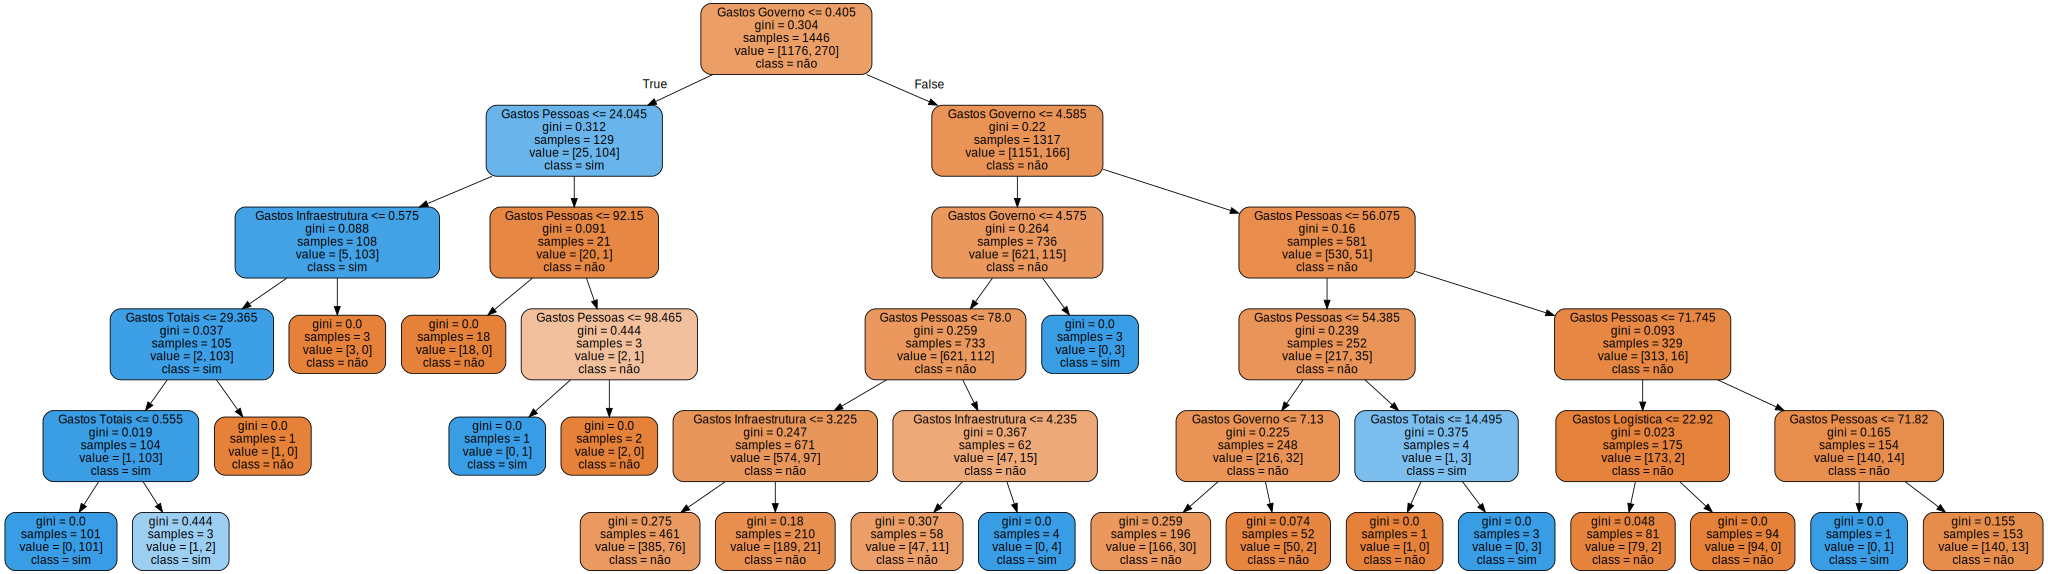

In [18]:
x = df_analfabetismo_15_a_24[['Gastos Pessoas', 'Gastos Totais', 'Gastos Logística', 'Gastos Infraestrutura', 'Gastos Governo']]
y = df_analfabetismo_15_a_24['Analfabetismo 15 a 24']

#Define a ordem dos números aleatórios e tetira a aleatoriedade da separação dos dados de treino e teste.
SEED = 20
np.random.seed(SEED)

treino_x_bruto_dtc, teste_x_bruto_dtc, treino_y_dtc, teste_y_dtc = train_test_split(x, y, random_state = SEED, test_size=0.25, stratify=y)
#O parâmetro "stratify=y" orienta o algoritmo a estratificar (separar proporcionalmente) os dados de acordo com o "y".

modelo = DecisionTreeClassifier(max_depth=5)

classificar(DecisionTreeClassifier(max_depth=5), treino_x_bruto_dtc, teste_x_bruto_dtc, treino_y_dtc, teste_y_dtc, "DecisionTreeClassifier")


modelo.fit(treino_x_bruto_dtc, treino_y_dtc)
previsoes = modelo.predict(teste_x_bruto_dtc)
acuracia = accuracy_score(teste_y_dtc, previsoes)
features = x.columns
dados_dot = export_graphviz(modelo, feature_names=features, rounded=True, filled=True, class_names=['não', 'sim'])
imagem = graphviz.Source(dados_dot)
imagem

#### Essa lógica calcula qual a média de zeros do indicador de analfabetismo "UIS.LP.AG15T24" (coluna a ser usada na classificação binária). O resultado disso já mostra uma incerteza na acurácia das classificações realizadas.

In [15]:
df = df_massa_bruta_por_indicador.loc[df_massa_bruta_por_indicador['Indicator Code'] == 'UIS.LP.AG15T24']
df.index = range(df.shape[0])
df = df.iloc[:, 2:18]
print("A média de valores não preenchidos (que receberão o valor zero) é de %.2f%%" % (df.isna().mean().mean() * 100))

A média de valores não preenchidos (que receberão o valor zero) é de 87.15%
